## Autoencoder for dimensionality reduction

#### Data Preparation:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
path = 'MNIST/'
data_train = pd.read_csv(path+'train.csv')#.drop('Unnamed: 0',axis=1)
data_test = pd.read_csv(path+'test.csv')#.drop('Unnamed: 0',axis=1)

In [4]:
data_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data_train['label'].value_counts()/len(data_train)

1    0.112367
7    0.104417
3    0.102183
2    0.099300
9    0.099150
0    0.098717
6    0.098633
8    0.097517
4    0.097367
5    0.090350
Name: label, dtype: float64

In [7]:
data_test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X_train = data_train[[col for col in data_train.columns if 'x' in col]]
y_train = data_train['label']

X_test = data_test[[col for col in data_test.columns if 'x' in col]]
y_test = data_test['label']

Rescaling data so that each data attribute is contained in the interval $[0,1]$

In [9]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [10]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [15]:
X_train

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Autoencoder architecture

In [16]:
act = 'sigmoid'
input_img = Input(shape=(784,))
e0 = Dense(units = 300, activation = act)(input_img)
e3 = Dense(units = 50, activation = act)(e0)
encoded = Dense(units = 2,activation = act)(e3)
d2 = Dense(units = 50, activation = act)(encoded)
d5 = Dense(units = 300, activation = act)(d2)
decoded = Dense(units = 784, activation = act)(d5) 


autoencoder = Model(input_img, decoded)

encoder = Model(input_img,encoded)

autoencoder.compile(optimizer = 'Adam', loss = 'MSE', metrics = ['MSE'])

autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 50)                15050     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 102       
_________________________________________________________________
dense_3 (Dense)              (None, 50)                150       
_________________________________________________________________
dense_4 (Dense)              (None, 300)               15300     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               235984

#### Fit autoencoder

In [17]:
history = autoencoder.fit(X_train, X_train, epochs = 50, \
                          shuffle = True, validation_data = (X_test,X_test))

Epoch 1/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0684 - MSE: 0.0684 - val_loss: 0.0593 - val_MSE: 0.0593
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0565 - MSE: 0.0565 - val_loss: 0.0513 - val_MSE: 0.0513
Epoch 3/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0507 - MSE: 0.0507 - val_loss: 0.0483 - val_MSE: 0.0483
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0479 - MSE: 0.0479 - val_loss: 0.0457 - val_MSE: 0.0457
Epoch 5/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0450 - MSE: 0.0450 - val_loss: 0.0435 - val_MSE: 0.0435
Epoch 6/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0431 - MSE: 0.0431 - val_loss: 0.0422 - val_MSE: 0.0422
Epoch 7/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0419 - MSE: 0.0419 - val_loss: 0.0412 - val_MSE: 0.0412
Epoch 8/50
1875/1875 [==============================] - 1

### Verifying there is no overfitting

dict_keys(['loss', 'MSE', 'val_loss', 'val_MSE'])


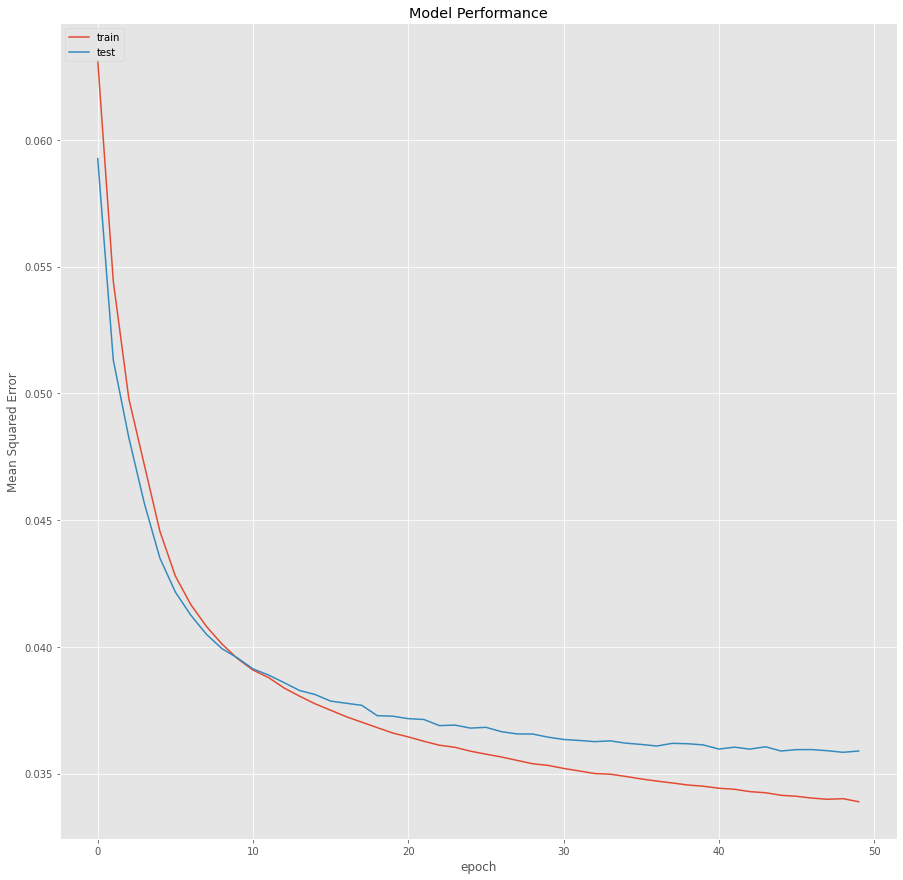

In [18]:
print(history.history.keys())
plt.figure(figsize=(15,15))
plt.plot(history.history['MSE'])
plt.plot(history.history['val_MSE'])
plt.title('Model Performance')
plt.ylabel('Mean Squared Error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(path+'model_performance.png', dpi = 300)
plt.show()

In [25]:
labels_dict = {0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6',\
         7:'7', 8:'8', 9:'9'}

In [26]:
sample_data = pd.concat([pd.DataFrame(X_test), data_test['label']], axis = 1)
sample_images = []
labels = list(sample_data['label'].unique())
labels.sort()
for label in labels:
    image = sample_data[sample_data['label'] == label].sample(1, random_state = 1), label
    sample_images.append(image)

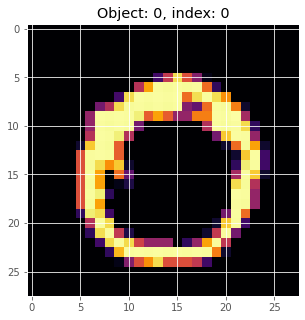

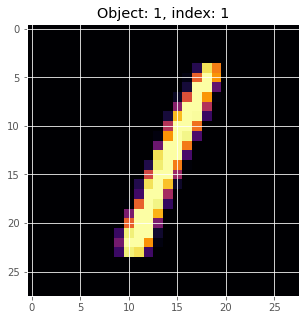

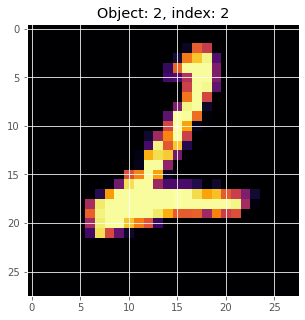

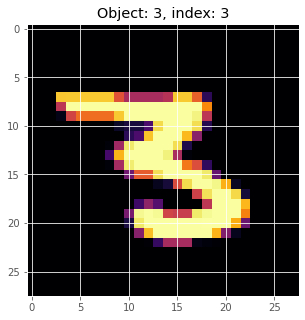

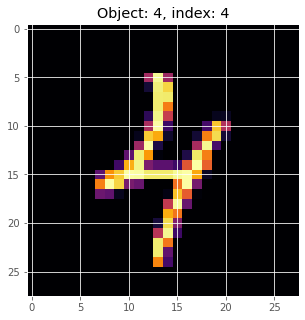

In [28]:
for i,image in enumerate(sample_images[:5]):
    x = image[0].drop('label',axis=1)
    plt.figure(figsize=(5,5))
    idx = list(image[0].label.values).pop()
    object_label = labels_dict[idx]
    plt.title('Object: ' + object_label + ', ' + 'index: ' + str(idx))
    plt.imshow(x.to_numpy().reshape(28,28), cmap = 'inferno')
    plt.savefig(path+'sample_images/' + object_label + '.png', dpi=300)

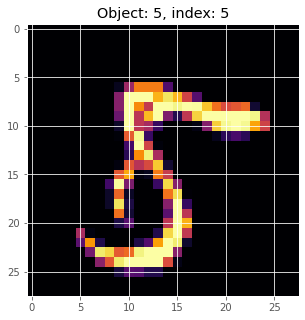

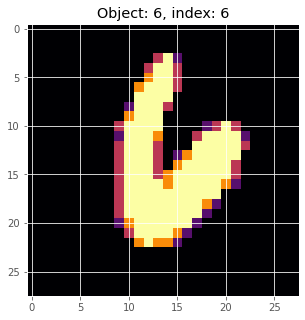

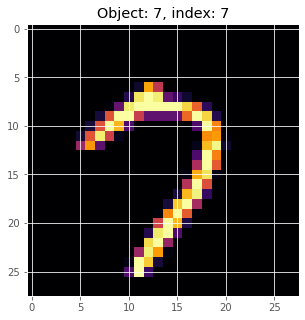

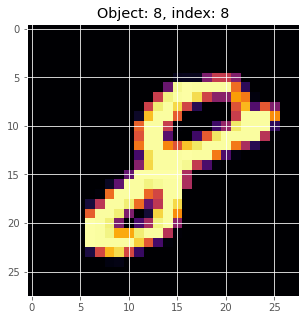

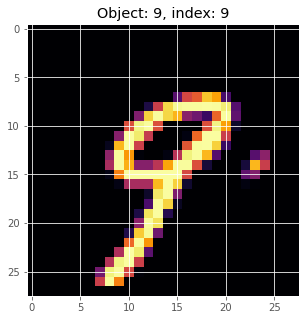

In [29]:
for i,image in enumerate(sample_images[5:]):
    x = image[0].drop('label',axis=1)
    plt.figure(figsize=(5,5))
    idx = list(image[0].label.values).pop()
    object_label = labels_dict[idx]
    plt.title('Object: ' + object_label + ', ' + 'index: ' + str(idx))
    plt.imshow(x.to_numpy().reshape(28,28), cmap = 'inferno')
    plt.savefig(path+'sample_images/' + object_label + '.png', dpi=300)

### Using the encoder to project onto a lower-dimensional space

In [30]:
proyection_test = encoder.predict(X_test)

In [31]:
P1,P2 = proyection_test[:,0],proyection_test[:,1] 

In [32]:
mapper_input_full = pd.concat((pd.Series(P1, name = 'P1'), pd.Series(P2, name = 'P2'), \
pd.Series(y_test,name='label'), X_test), axis=1)

In [33]:
mapper_input_full

,P1,P2,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0.151289,0.855976,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.635701,0.290369,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.880572,0.726760,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.158464,0.129391,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.224920,0.466948,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.725877,0.279417,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.354007,0.154576,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.444403,0.745394,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.690310,0.560056,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Visualizing the projection

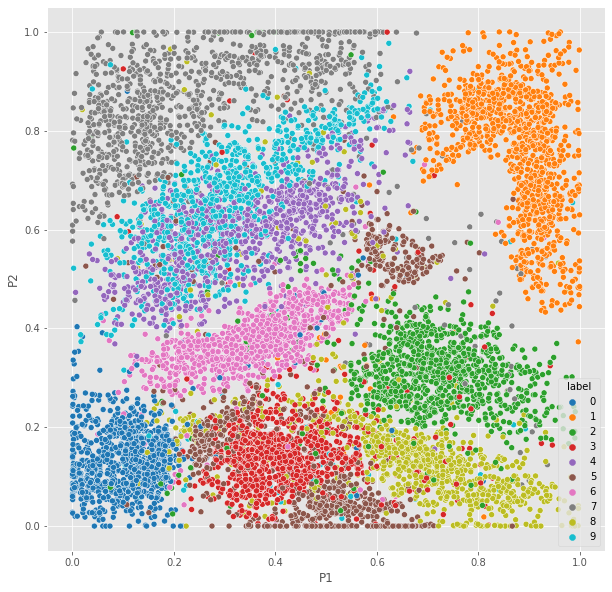

In [34]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=mapper_input_full['P1'],\
                y=mapper_input_full['P2'], hue=data_test['label'], palette='tab10')
plt.savefig(path+'MNIST_Encoder.png',dpi=300)

In [35]:
#Save the final dataset that will be used as a mapper filter function.
mapper_input_full.to_csv(path+'mapper_input_full.csv')